Примечание: <br>
Данные находятся по ссылке: https://www.kaggle.com/tmthyjames/nashville-housing-data

**Подключение библиотек и скриптов.**

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

**Пути к директориям и файлам.**

In [2]:
DATASET_PATH = './housing_nashville.csv'

**Загрузка данных.**

In [3]:
# Загружаем колонку Sale Date сразу в формате datetime64
housing_df = pd.read_csv(DATASET_PATH, sep=',', parse_dates=['Sale Date'])
housing_df.head(3)

Unnamed: 0  Unnamed: 0.1         Parcel ID           Land Use  \
0           0             0  105 03 0D 008.00  RESIDENTIAL CONDO   
1           1             1   105 11 0 080.00      SINGLE FAMILY   
2           2             2   118 03 0 130.00      SINGLE FAMILY   

    Property Address Suite/ Condo   # Property City  Sale Date  Sale Price  \
0    1208  3RD AVE S                8     NASHVILLE 2013-01-24      132000   
1   1802  STEWART PL              NaN     NASHVILLE 2013-01-11      191500   
2  2761  ROSEDALE PL              NaN     NASHVILLE 2013-01-18      202000   

    Legal Reference  ... Building Value Total Value Finished Area  \
0  20130128-0008725  ...            NaN         NaN           NaN   
1  20130118-0006337  ...       134400.0    168300.0    1149.00000   
2  20130124-0008033  ...       157800.0    191800.0    2090.82495   

  Foundation Type Year Built Exterior Wall  Grade Bedrooms  Full Bath  \
0             NaN        NaN           NaN    NaN      NaN        NaN   
1         PT BSMT     1941.0         BRICK   C         2.0        1.0   
2            SLAB     2000.0   BRICK/FRAME   C         3.0        2.0   

  Half Bath  
0       NaN  
1       0.0  
2       1.0  

[3 rows x 31 columns]

In [4]:
housing_df.shape

(56636, 31)

In [5]:
housing_df["Year Sold"] = housing_df["Sale Date"].dt.year

In [6]:
housing_df.head(3)

Unnamed: 0  Unnamed: 0.1         Parcel ID           Land Use  \
0           0             0  105 03 0D 008.00  RESIDENTIAL CONDO   
1           1             1   105 11 0 080.00      SINGLE FAMILY   
2           2             2   118 03 0 130.00      SINGLE FAMILY   

    Property Address Suite/ Condo   # Property City  Sale Date  Sale Price  \
0    1208  3RD AVE S                8     NASHVILLE 2013-01-24      132000   
1   1802  STEWART PL              NaN     NASHVILLE 2013-01-11      191500   
2  2761  ROSEDALE PL              NaN     NASHVILLE 2013-01-18      202000   

    Legal Reference  ... Total Value Finished Area Foundation Type Year Built  \
0  20130128-0008725  ...         NaN           NaN             NaN        NaN   
1  20130118-0006337  ...    168300.0    1149.00000         PT BSMT     1941.0   
2  20130124-0008033  ...    191800.0    2090.82495            SLAB     2000.0   

  Exterior Wall Grade  Bedrooms Full Bath  Half Bath Year Sold  
0           NaN   NaN       NaN       NaN        NaN      2013  
1         BRICK  C          2.0       1.0        0.0      2013  
2   BRICK/FRAME  C          3.0       2.0        1.0      2013  

[3 rows x 32 columns]

In [7]:
housing_df["Sale Price"].max()

54278060

In [8]:
housing_df["Sale Price"].min()

50

In [9]:
housing_df["Sale Price"].median()

205450.0

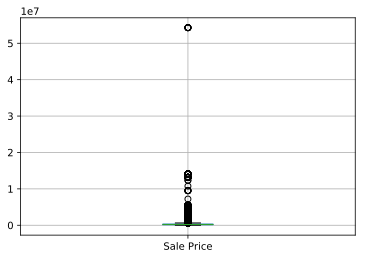

In [10]:
housing_df.boxplot(column="Sale Price");

**Присутствуют выбросы. Максимальное значение 54 миллиона уходит в стратосферу с огромным отрывом от остальных.**

In [11]:
housing_df["Sale Price Outliers"] = 0
housing_df.loc[(housing_df["Sale Price"] == housing_df["Sale Price"].max()) | \
               (housing_df["Sale Price"] == housing_df["Sale Price"].min()), "Sale Price Outliers"] = 1

**Помечаем нижние 2% продаж, как "outliers". Это стоимость ниже 35 500 долларов.**

In [12]:
lower_threshold = np.quantile(housing_df["Sale Price"],0.02)
lower_threshold

35500.0

In [13]:
housing_df.loc[housing_df["Sale Price"] < lower_threshold, "Sale Price Outliers"] = 1

**Помечаем верхние 2% продаж, как "outliers". Это стоимость выше 1 269 853 долларов.**

In [14]:
upper_threshold = np.quantile(housing_df["Sale Price"],0.98)
upper_threshold

1269853.0

In [15]:
housing_df.loc[housing_df["Sale Price"] > upper_threshold, "Sale Price Outliers"] = 1

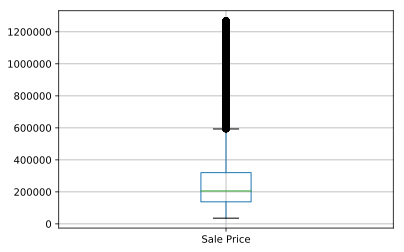

In [16]:
housing_df.loc[housing_df["Sale Price Outliers"] == 0].boxplot(column="Sale Price");

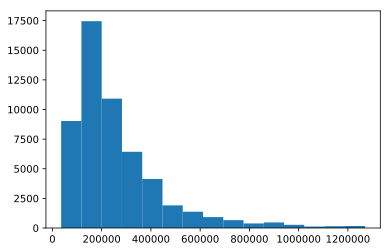

In [17]:
plt.hist(housing_df.loc[housing_df["Sale Price Outliers"] == 0]["Sale Price"], bins=15);

In [18]:
housing_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID', 'Land Use',
       'Property Address', 'Suite/ Condo   #', 'Property City', 'Sale Date',
       'Sale Price', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Owner Name', 'Address', 'City',
       'State', 'Acreage', 'Tax District', 'Neighborhood', 'image',
       'Land Value', 'Building Value', 'Total Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath', 'Year Sold', 'Sale Price Outliers'],
      dtype='object')

**Избавляемся от колонок не несущих дополнительной информации для последующего машинного обучения.**

In [19]:
housing_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID', 'Suite/ Condo   #', 'Sale Date', \
                        'Legal Reference', 'image'], inplace=True)

**Избавляемся от колонок Land Value, Building Value и Total Value, так как наш target variable - Sale Price. 
Эти колонки фактически являются "proxy variable" для Sale Price.**

In [20]:
housing_df.drop(columns=['Land Value', 'Building Value', 'Total Value'],inplace=True)

**Убираем колонки Owner Name и State, так как штат всегда Tennessee, а обучать модель обращать внимание на имя владельца будет плохим тоном.**

In [21]:
housing_df.drop(columns=['Owner Name','State'],inplace=True)

**Колонка Year Built состоит из большого количества пропусков**

In [22]:
print('{}{}'.format(int(housing_df['Year Built'].isna().sum() / housing_df['Year Built'].size * 100),'%'))

57%


**Постройки 'RESIDENTIAL CONDO' в ста процентах случаев не имеют записей в большинстве колонок. Нули означают, что
записей нет совсем.**

In [23]:
pd.options.display.max_rows = 50
housing_df[housing_df['Land Use'] == 'RESIDENTIAL CONDO'].count()

Land Use                             14081
Property Address                     14080
Property City                        14080
Sale Price                           14081
Sold As Vacant                       14081
Multiple Parcels Involved in Sale    14081
Address                                  0
City                                     0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Finished Area                            0
Foundation Type                          0
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 0
Full Bath                                0
Half Bath                                0
Year Sold                            14081
Sale Price Outliers                  14081
dtype: int64

**Постройки 'SINGLE FAMILY' заполнены намного лучше.**

In [24]:
housing_df[housing_df['Land Use'] == 'SINGLE FAMILY'].count()

Land Use                             34268
Property Address                     34197
Property City                        34197
Sale Price                           34268
Sold As Vacant                       34268
Multiple Parcels Involved in Sale    34268
Address                              21877
City                                 21877
Acreage                              21877
Tax District                         21877
Neighborhood                         21877
Finished Area                        21390
Foundation Type                      21389
Year Built                           21390
Exterior Wall                        21390
Grade                                21390
Bedrooms                             21387
Full Bath                            21389
Half Bath                            21289
Year Sold                            34268
Sale Price Outliers                  34268
dtype: int64

In [25]:
housing_df['Land Use'].value_counts().head(10)

SINGLE FAMILY              34268
RESIDENTIAL CONDO          14081
VACANT RESIDENTIAL LAND     3586
VACANT RES LAND             1575
DUPLEX                      1389
ZERO LOT LINE               1049
CONDO                        252
RESIDENTIAL COMBO/MISC        95
TRIPLEX                       92
QUADPLEX                      39
Name: Land Use, dtype: int64

**С точки зрения имеющихся свойств (колонок), стоит разбить обучение на две категории: <br>**
**1) земля и 2) жилое помещение <br>**
**Земля - это VACANT RESIDENTIAL LAND, VACANT RES LAND и ZERO LOT LINE <br>**
**Жилое помещение - это SINGLE FAMILY и DUPLEX**

In [26]:
housing_df.loc[housing_df['Land Use']=='DUPLEX'].count()

Land Use                             1389
Property Address                     1373
Property City                        1373
Sale Price                           1389
Sold As Vacant                       1389
Multiple Parcels Involved in Sale    1389
Address                              1253
City                                 1253
Acreage                              1253
Tax District                         1253
Neighborhood                         1253
Finished Area                        1190
Foundation Type                      1190
Year Built                           1190
Exterior Wall                        1190
Grade                                1190
Bedrooms                             1190
Full Bath                            1190
Half Bath                            1184
Year Sold                            1389
Sale Price Outliers                  1389
dtype: int64

**Создаем выборку домов (жилых помещений) с существующими данными.** 

In [27]:
residential_df = housing_df.loc[(housing_df['Land Use'] == 'DUPLEX')|(housing_df['Land Use']=='SINGLE FAMILY')]

**Property Address и Address, а также Property City и City - это дублирующиеся колонки. Пропусков в колонках Property Address и Property City намного меньше, так что оставим только их.**

In [28]:
residential_df.drop(['Address','City'], axis=1, inplace=True)

**Клонки и поля с отстутствующими значениями в колонке Property City пусты на 100%. Скорее всего, от них лучше избавиться, так как дата будет фактически сгенерирована с нуля.**

In [29]:
residential_df.loc[residential_df['Property City'].isna()].head(3)

Land Use Property Address Property City  Sale Price Sold As Vacant  \
1124         DUPLEX              NaN           NaN      150000             No   
1891  SINGLE FAMILY              NaN           NaN      360000             No   
2818  SINGLE FAMILY              NaN           NaN      245000             No   

     Multiple Parcels Involved in Sale  Acreage Tax District  Neighborhood  \
1124                                No      NaN          NaN           NaN   
1891                                No      NaN          NaN           NaN   
2818                                No      NaN          NaN           NaN   

      Finished Area Foundation Type  Year Built Exterior Wall Grade  Bedrooms  \
1124            NaN             NaN         NaN           NaN   NaN       NaN   
1891            NaN             NaN         NaN           NaN   NaN       NaN   
2818            NaN             NaN         NaN           NaN   NaN       NaN   

      Full Bath  Half Bath  Year Sold  Sale Price Outliers  
1124        NaN        NaN       2013                    0  
1891        NaN        NaN       2013                    0  
2818        NaN        NaN       2013                    0

In [30]:
residential_df = residential_df.loc[~residential_df['Property City'].isna()]
residential_df.groupby('Land Use', as_index=False)['Acreage'].mean()

Land Use   Acreage
0         DUPLEX  0.324062
1  SINGLE FAMILY  0.460200

**Заполняем отсутствующие значения Acreage средними значениями групп Land Use.** 

In [31]:
residential_df['Acreage'] = residential_df.groupby('Land Use')['Acreage'].apply(lambda x: x.fillna(x.mean()))
residential_df['Acreage'].isna().sum()

0

**В пригороде NOLENSVILLE колонка Tax District не заполнена на 100%**

In [32]:
residential_df.groupby(['Property City']).agg(pd.Series.mode)['Tax District']

Property City
ANTIOCH             URBAN SERVICES DISTRICT
BRENTWOOD           URBAN SERVICES DISTRICT
GOODLETTSVILLE       CITY OF GOODLETTSVILLE
HERMITAGE         GENERAL SERVICES DISTRICT
JOELTON           GENERAL SERVICES DISTRICT
MADISON           GENERAL SERVICES DISTRICT
MOUNT JULIET      GENERAL SERVICES DISTRICT
NASHVILLE           URBAN SERVICES DISTRICT
NOLENSVILLE                              []
OLD HICKORY       GENERAL SERVICES DISTRICT
WHITES CREEK      GENERAL SERVICES DISTRICT
Name: Tax District, dtype: object

In [33]:
residential_df.loc[residential_df['Property City']=='NOLENSVILLE']['Tax District'].count()

0

**Заполняем пустые значения Tax Distric пригорода NOLENSVILLE значениями NOLENSVILLE.**

In [34]:
residential_df.loc[residential_df['Property City'] == 'NOLENSVILLE', 'Tax District'] = 'NOLENSVILLE'

**Заполняем значения Tax Distric, извлекая их из соответствующего названия города.**

In [35]:
pd.DataFrame(residential_df.groupby('Property City')['Tax District'].\
                                 agg(pd.Series.mode))

Tax District
Property City                            
ANTIOCH           URBAN SERVICES DISTRICT
BRENTWOOD         URBAN SERVICES DISTRICT
GOODLETTSVILLE     CITY OF GOODLETTSVILLE
HERMITAGE       GENERAL SERVICES DISTRICT
JOELTON         GENERAL SERVICES DISTRICT
MADISON         GENERAL SERVICES DISTRICT
MOUNT JULIET    GENERAL SERVICES DISTRICT
NASHVILLE         URBAN SERVICES DISTRICT
NOLENSVILLE                   NOLENSVILLE
OLD HICKORY     GENERAL SERVICES DISTRICT
WHITES CREEK    GENERAL SERVICES DISTRICT

In [36]:
residential_df['Tax District'] = \
residential_df.groupby('Property City')[['Tax District']].transform(lambda x: x.fillna(x.mode()[0]))

**Заподлняем уровень (крутизну) наклона близлежащей дороги.**

In [37]:
residential_df['Grade'].value_counts() 

C       16199
B        3377
D        1914
A         545
X         482
E          57
OFC         1
AAB         1
OFB         1
SSC         1
Name: Grade, dtype: int64

**Убираем наблюдения с единичными записями.**

In [38]:
residential_df['Grade'] = residential_df.groupby('Grade').filter(lambda x: len(x) > 1)['Grade']

**Значения Grade пропущены в пригороде NOLENSVILLE в 100% случаев, но почти во всех пригородах самое распространенное значение Grade - это "С".**

In [39]:
residential_df.groupby('Property City')['Grade'].agg(pd.Series.mode)

Property City
ANTIOCH           C   
BRENTWOOD         B   
GOODLETTSVILLE    C   
HERMITAGE         C   
JOELTON           C   
MADISON           C   
MOUNT JULIET      C   
NASHVILLE         C   
NOLENSVILLE         []
OLD HICKORY       C   
WHITES CREEK      C   
Name: Grade, dtype: object

**Заполняем пропущенные значения Grade - "C".**

In [40]:
residential_df["Grade"].fillna("C", inplace=True)

**Создаем бинарные колонки (фичи) для машинного обучения.**

In [41]:
residential_df = pd.get_dummies(residential_df, columns=['Grade'])

**CRAWL - самое частое значение Foundation Type.**

In [42]:
residential_df['Foundation Type'].value_counts()

CRAWL        14165
FULL BSMT     3816
PT BSMT       3128
SLAB          1428
PIERS           36
TYPICAL          4
Name: Foundation Type, dtype: int64

**В пригороде NOLENSVILLE пропущены все значения.**

In [43]:
residential_df.groupby('Property City')['Foundation Type'].agg(pd.Series.mode)

Property City
ANTIOCH           CRAWL
BRENTWOOD         CRAWL
GOODLETTSVILLE    CRAWL
HERMITAGE         CRAWL
JOELTON           CRAWL
MADISON           CRAWL
MOUNT JULIET      CRAWL
NASHVILLE         CRAWL
NOLENSVILLE          []
OLD HICKORY       CRAWL
WHITES CREEK      CRAWL
Name: Foundation Type, dtype: object

**Заполняем пропуски значением CRAWL.**

In [44]:
residential_df['Foundation Type'].fillna('CRAWL', inplace=True)

**Вычисляем медиану площади дома, исходя из количества комнат.**

In [45]:
np.round(residential_df.groupby('Bedrooms', as_index=False)['Finished Area'].agg('median'),2)

Bedrooms  Finished Area
0        0.0        1791.50
1        1.0         880.00
2        2.0        1108.50
3        3.0        1607.00
4        4.0        2332.00
5        5.0        3759.91
6        6.0        3484.00
7        7.0        4894.50
8        8.0        3240.00
9        9.0        3576.07
10      10.0       15378.00
11      11.0        9235.00

**Находим самую популярную конфигурацию комнат.**

In [46]:
residential_df.groupby('Property City')['Bedrooms'].agg(pd.Series.mode)

Property City
ANTIOCH            3
BRENTWOOD          4
GOODLETTSVILLE     3
HERMITAGE          3
JOELTON            3
MADISON            3
MOUNT JULIET       3
NASHVILLE          3
NOLENSVILLE       []
OLD HICKORY        3
WHITES CREEK       3
Name: Bedrooms, dtype: object

**Заполняем медианой пропуски. Так как пригород NOLENSVILLE пуст на 100%, мы заполняем его первым.**

In [47]:
residential_df.loc[residential_df['Property City'] == 'NOLENSVILLE', 'Bedrooms'] = 3
residential_df.loc[residential_df['Property City'] == 'NOLENSVILLE', 'Finished Area'] = 1607

In [48]:
residential_df['Bedrooms'] = \
residential_df.groupby('Property City')['Bedrooms'].apply(lambda x: x.fillna(x.median()))

In [49]:
residential_df['Finished Area'] = \
residential_df.groupby('Bedrooms')['Finished Area'].\
apply(lambda x: np.round(x.fillna(x.mode()[0]),1))

In [50]:
residential_df[['Bedrooms', 'Finished Area']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35570 entries, 1 to 56615
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       35570 non-null  float64
 1   Finished Area  35570 non-null  float64
dtypes: float64(2)
memory usage: 2.1 MB


**Пригород NOLENSVILLE снова пуст. Заполним его значениями 1234.**

In [51]:
residential_df.loc[residential_df['Property City'] == 'NOLENSVILLE', 'Neighborhood'] = 1234

In [52]:
freq_nei = residential_df.groupby('Property City', as_index=False)[['Neighborhood']].agg(pd.Series.mode)
freq_nei

Property City  Neighborhood
0          ANTIOCH        6027.0
1        BRENTWOOD        4027.0
2   GOODLETTSVILLE        9326.0
3        HERMITAGE        6233.0
4          JOELTON        7226.0
5          MADISON        6927.0
6     MOUNT JULIET        6235.0
7        NASHVILLE        4026.0
8      NOLENSVILLE        1234.0
9      OLD HICKORY        6226.0
10    WHITES CREEK        6828.0

In [53]:
residential_df['Neighborhood'] = \
residential_df.groupby('Property City')['Neighborhood'].apply(lambda x: x.fillna(x.mode()[0]))

In [54]:
residential_df[['Neighborhood']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35570 entries, 1 to 56615
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  35570 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


**Заполняем пропуски в колонке Year Built медианой.**

In [55]:
residential_df.loc[residential_df['Property City'] == 'NOLENSVILLE', 'Year Built'] = \
residential_df['Year Built'].median()

In [56]:
residential_df['Year Built'] = residential_df.groupby('Property City')['Year Built'].\
apply(lambda x: x.fillna(x.median()))

In [57]:
residential_df[['Year Built']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35570 entries, 1 to 56615
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year Built  35570 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


**Самая распространенная конфигурация - это два санузла.**

In [58]:
residential_df['Full Bath'].mode()

0    2.0
dtype: float64

**Заполняем пропуски в пригороде NOLENSVILLE этими значениями.**

In [59]:
residential_df.loc[residential_df['Property City'] == 'NOLENSVILLE', 'Full Bath'] = 2

In [60]:
residential_df['Full Bath'] = \
residential_df.groupby('Property City')['Full Bath'].apply(lambda x: x.fillna(x.mode()[0]))

In [61]:
residential_df.groupby('Property City', as_index=False)[['Half Bath']].agg(pd.Series.mode)

Property City Half Bath
0          ANTIOCH         0
1        BRENTWOOD         0
2   GOODLETTSVILLE         0
3        HERMITAGE         0
4          JOELTON         0
5          MADISON         0
6     MOUNT JULIET         0
7        NASHVILLE         0
8      NOLENSVILLE        []
9      OLD HICKORY         0
10    WHITES CREEK         0

**Значения Half Bath чаще всего ноль, так что заполняем этим значением пропуски.**

In [62]:
residential_df['Half Bath'] = residential_df['Half Bath'].fillna(0)

**Самый распространенный материал внешней стенки - кирпич.** 

In [63]:
residential_df.groupby(['Property City'])[['Exterior Wall']].agg(pd.Series.mode)

Exterior Wall
Property City               
ANTIOCH          BRICK/FRAME
BRENTWOOD              BRICK
GOODLETTSVILLE         BRICK
HERMITAGE              BRICK
JOELTON                BRICK
MADISON                BRICK
MOUNT JULIET           BRICK
NASHVILLE              BRICK
NOLENSVILLE               []
OLD HICKORY            FRAME
WHITES CREEK           FRAME

In [64]:
residential_df.loc[residential_df['Property City'] == 'NOLENSVILLE', 'Exterior Wall'] = 'BRICK'

**Заполняем пропуски, группируя по каждому городу.**

In [65]:
residential_df['Exterior Wall'] = \
residential_df.groupby('Property City')['Exterior Wall'].apply(lambda x: x.fillna(x.mode()[0]))

**Генерируем бинарные фичи.**

In [66]:
residential_df = pd.get_dummies(residential_df, columns=['Land Use', 'Property City','Exterior Wall', \
                                        'Tax District'], prefix='', prefix_sep='')

In [67]:
residential_df = \
pd.get_dummies(residential_df, columns = ['Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Bedrooms', \
                                         'Full Bath', 'Half Bath', 'Foundation Type', 'Year Sold'])
residential_df.head(3)

Property Address  Sale Price  Acreage  Neighborhood  Finished Area  \
1   1802  STEWART PL      191500     0.17        3127.0         1149.0   
2  2761  ROSEDALE PL      202000     0.11        9126.0         2090.8   
3  224  PEACHTREE ST       32000     0.17        3130.0         2145.6   

   Year Built  Sale Price Outliers  Grade_A     Grade_B     Grade_C  ...  \
1      1941.0                    0           0           0        0  ...   
2      2000.0                    0           0           0        0  ...   
3      1948.0                    1           0           1        0  ...   

   Foundation Type_CRAWL  Foundation Type_FULL BSMT  Foundation Type_PIERS  \
1                      0                          0                      0   
2                      0                          0                      0   
3                      0                          1                      0   

   Foundation Type_PT BSMT  Foundation Type_SLAB  Foundation Type_TYPICAL  \
1                        1                     0                        0   
2                        0                     1                        0   
3                        0                     0                        0   

   Year Sold_2013  Year Sold_2014  Year Sold_2015  Year Sold_2016  
1               1               0               0               0  
2               1               0               0               0  
3               1               0               0               0  

[3 rows x 85 columns]

In [68]:
%%capture --no-stdout
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

**Разбиваем год строительства на категории.**

In [69]:
bins = [0, 1925, 1950, 1975, 2000, residential_df["Year Built"].max()]
residential_df["Year Category"] = pd.cut(residential_df["Year Built"], bins=bins, labels=False)

**Разбиваем площадь объекта недвижимости на категории.**

In [70]:
area_bins = np.arange(residential_df["Finished Area"].min(), residential_df["Finished Area"].max(), 1200)
residential_df["Finished Area Category"] = pd.cut(residential_df["Finished Area"], bins=area_bins, labels=False)
residential_df["Finished Area Category"] = residential_df["Finished Area Category"].fillna(10)

**Разбиваем площадь земли на категории.**

In [71]:
acreage_bins = [residential_df["Acreage"].min(), \
                np.quantile(residential_df["Acreage"],0.15), \
                np.quantile(residential_df["Acreage"],0.25), \
                np.quantile(residential_df["Acreage"],0.75), \
                residential_df["Acreage"].max()]
residential_df["Acreage Category"] = pd.cut(residential_df["Acreage"], bins=acreage_bins, labels=False)
residential_df["Acreage Category"] = residential_df["Acreage Category"].fillna(0)

**Добавляем районы.**

In [72]:
residential_df = pd.get_dummies(residential_df, columns=["Neighborhood"])

**Извлекаем бинарные фичи в переменную Х.**

In [73]:
X = residential_df.iloc[:,9:]
X.head(3)

Grade_C     Grade_D     Grade_E     Grade_X     DUPLEX  SINGLE FAMILY  \
1           1           0           0           0       0              1   
2           1           0           0           0       0              1   
3           0           0           0           0       0              1   

   ANTIOCH  BRENTWOOD  GOODLETTSVILLE  HERMITAGE  ...  Neighborhood_9126.0  \
1        0          0               0          0  ...                    0   
2        0          0               0          0  ...                    1   
3        0          0               0          0  ...                    0   

   Neighborhood_9226.0  Neighborhood_9326.0  Neighborhood_9327.0  \
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   

   Neighborhood_9328.0  Neighborhood_9526.0  Neighborhood_9527.0  \
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   

   Neighborhood_9528.0  Neighborhood_9529.0  Neighborhood_9530.0  
1                    0                    0                    0  
2                    0                    0                    0  
3                    0                    0                    0  

[3 rows x 270 columns]

**Заполняем таргет-переменную.**

In [74]:
y = residential_df["Sale Price"]
y.head()

1    191500
2    202000
3     32000
4    102000
5     93736
Name: Sale Price, dtype: int64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [76]:
rf4 = RandomForestRegressor(random_state=42, n_estimators=100)

**Тренируем модель RandomForestRegressor.**

In [77]:
rf4.fit(X_train, y_train.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [78]:
y_pred4 = rf4.predict(X_test)

In [79]:
pd.DataFrame({"Значения": y_test, "Предсказания": (y_pred4).astype(int)}).head()

Значения  Предсказания
41507    158000        186899
33269    220000        331383
21159    540000        449550
17371    139000        137640
8107     171000        201369

**Оцениваем модель метрикой r2.**

In [80]:
np.round(r2_score(y_test, y_pred4),2)

0.71

**Сортируем фичи по их значимости.**

In [81]:
pd.options.display.max_rows = 10
pd.DataFrame({"Значимость": rf4.feature_importances_, "Названия": X.columns }).\
sort_values(by="Значимость", ascending=False).head(10)

Значимость                               Названия
76     0.347936                 Finished Area Category
72     0.069995                         Year Sold_2014
3      0.051273                             Grade_X   
34     0.044092                      Sold As Vacant_No
35     0.038664                     Sold As Vacant_Yes
75     0.031981                          Year Category
203    0.030973                    Neighborhood_6027.0
37     0.025934  Multiple Parcels Involved in Sale_Yes
36     0.023120   Multiple Parcels Involved in Sale_No
0      0.019585                             Grade_C

**Проверяем степень переобучения.**

In [82]:
train_predict = rf4.predict(X_train)

In [83]:
pd.DataFrame({"train": y_train, "predict": train_predict}).head()

train        predict
20721  179000  179330.048286
21460  267000  252725.306333
24164  141900  147280.823333
33688  163000  186899.318480
8172   128500  135002.683333

In [84]:
np.round(r2_score(y_train, train_predict),2)

0.82

**Некоторое переобучение присутствует, так как предсказания на тренировочных данных на 10% точнее, чем на тестовых.**

In [85]:
import seaborn as sns
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2_score(train_true_values, train_pred_values), 2)))
    print("Test R2:\t" + str(round(r2_score(test_true_values, test_pred_values), 2)))
    
    plt.figure(figsize=(11,6))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    plt.xticks(rotation=45)
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    plt.xticks(rotation=45)

    plt.show()

In [86]:
evaluate_preds(y_train, train_predict, y_test, y_pred4)

Train R2:	0.82
Test R2:	0.71
